# Análisis Exploratorio de Datos (EDA) y Preprocesamiento

Este cuaderno realiza un análisis exploratorio de los datos (EDA) enfocado en las variables **numéricas** del dataset. También se sugiere un preprocesamiento orientado a modelos de machine learning supervisados para predecir `TARGET_LABEL_BAD`.

## Unir datos con columnas

In [1]:
import pandas as pd
from IPython.display import display, HTML
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

# Leer archivo de nombres de columnas desde Excel
variables_df = pd.read_excel("./external/PAKDD2010_VariablesList.XLS")
column_names = variables_df['Var_Title'].head(53).tolist()

# Leer datos sin cabecera desde archivo de texto
data_df = pd.read_csv("./external/PAKDD2010_Leaderboard_Data.txt", sep='\t', header=None)

# Asignar nombres de columnas
data_df.columns = column_names

save_path = os.path.abspath("external/data-with-columns.csv")
data_df.to_csv(save_path, index=False)
print(f"Archivo guardado en: {save_path}")


# Mostrar primeras 10 filas
display(HTML(data_df.head(10).to_html(index=False)))
print(data_df)

FileNotFoundError: [Errno 2] No such file or directory: './external/PAKDD2010_VariablesList.XLS'

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./external/data-columns-2.csv", sep='\t')
df.rename(columns={"TARGET_LABEL_BAD=1": "TARGET_LABEL_BAD"}, inplace=True)

numeric_df = df.select_dtypes(include=["int64", "float64"]).drop(columns=["ID_CLIENT"])
numeric_df.head()

,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,...,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL.1,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,TARGET_LABEL_BAD
0,5,0,1,6,1,0,1,1.0,15.0,1,...,4.0,NaN,NaN,0,0,0,0,1,32,1
1,15,0,1,2,0,0,1,1.0,1.0,1,...,4.0,11.0,NaN,0,0,0,0,1,34,1
2,5,0,1,2,0,0,1,1.0,NaN,1,...,NaN,NaN,NaN,0,0,0,0,1,27,0
3,20,0,1,2,0,0,1,NaN,NaN,1,...,NaN,NaN,NaN,0,0,0,0,1,61,0
4,10,0,1,2,0,0,1,1.0,12.0,1,...,5.0,NaN,NaN,0,0,0,0,1,48,1


## Análisis de nulos

In [4]:
print(numeric_df.dtypes)

PAYMENT_DAY                         int64
QUANT_ADDITIONAL_CARDS              int64
POSTAL_ADDRESS_TYPE                 int64
MARITAL_STATUS                      int64
QUANT_DEPENDANTS                    int64
EDUCATION_LEVEL                     int64
NACIONALITY                         int64
RESIDENCE_TYPE                    float64
MONTHS_IN_RESIDENCE               float64
FLAG_EMAIL                          int64
PERSONAL_MONTHLY_INCOME           float64
OTHER_INCOMES                     float64
FLAG_VISA                           int64
FLAG_MASTERCARD                     int64
FLAG_DINERS                         int64
FLAG_AMERICAN_EXPRESS               int64
FLAG_OTHER_CARDS                    int64
QUANT_BANKING_ACCOUNTS              int64
QUANT_SPECIAL_BANKING_ACCOUNTS      int64
PERSONAL_ASSETS_VALUE             float64
QUANT_CARS                          int64
MONTHS_IN_THE_JOB                   int64
PROFESSION_CODE                   float64
OCCUPATION_TYPE                   

## 0. Análisis de nulos

In [5]:
import pandas as pd

# Suponiendo que ya tenés definido numeric_df
total_filas = len(numeric_df)

# Calcular nulos por columna
nulos_por_columna = pd.DataFrame({
    'columna': numeric_df.columns,
    'nulos': numeric_df.isnull().sum()
})
nulos_por_columna['porcentaje_nulos'] = (nulos_por_columna['nulos'] / total_filas) * 100

# Filtrar columnas con al menos un nulo
nulos_por_columna = nulos_por_columna[nulos_por_columna['nulos'] > 0].copy()

# Agregar sugerencia basada en un umbral
umbral = 30  # % de nulos a partir del cual se sugiere eliminar
nulos_por_columna['sugerencia'] = nulos_por_columna['porcentaje_nulos'].apply(
    lambda x: 'ELIMINAR' if x > umbral else 'CONSERVAR / IMPUTAR'
)

# Ordenar por mayor porcentaje de nulos
nulos_por_columna = nulos_por_columna.sort_values(by='porcentaje_nulos', ascending=False).reset_index(drop=True)

# Imprimir los resultados en modo texto
print("\nAnálisis de columnas con valores nulos:")
print("----------------------------------------")
for _, row in nulos_por_columna.iterrows():
    print(f"Columna: {row['columna']}")
    print(f"  → Nulos: {row['nulos']}")
    print(f"  → Porcentaje de nulos: {row['porcentaje_nulos']:.2f}%")
    print(f"  → Sugerencia: {row['sugerencia']}")
    print("")

# Leyenda final
print(f"Total de filas del dataframe: {total_filas}")




Análisis de columnas con valores nulos:
----------------------------------------
Columna: EDUCATION_LEVEL.1
  → Nulos: 32338
  → Porcentaje de nulos: 64.68%
  → Sugerencia: ELIMINAR

Columna: MATE_PROFESSION_CODE
  → Nulos: 28884
  → Porcentaje de nulos: 57.77%
  → Sugerencia: ELIMINAR

Columna: PROFESSION_CODE
  → Nulos: 7756
  → Porcentaje de nulos: 15.51%
  → Sugerencia: CONSERVAR / IMPUTAR

Columna: OCCUPATION_TYPE
  → Nulos: 7313
  → Porcentaje de nulos: 14.63%
  → Sugerencia: CONSERVAR / IMPUTAR

Columna: MONTHS_IN_RESIDENCE
  → Nulos: 3777
  → Porcentaje de nulos: 7.55%
  → Sugerencia: CONSERVAR / IMPUTAR

Columna: RESIDENCE_TYPE
  → Nulos: 1349
  → Porcentaje de nulos: 2.70%
  → Sugerencia: CONSERVAR / IMPUTAR

Total de filas del dataframe: 50000



## 1. Clasificación de las variables numéricas

Se clasifican como discretas o continuas según su naturaleza y variedad de valores.

| Variable                       | Tipo                          |
|--------------------------------|-------------------------------|
| PAYMENT_DAY                    | Numérico Discreto             |
| QUANT_ADDITIONAL_CARDS         | Numérico Discreto             |
| POSTAL_ADDRESS_TYPE            | Numérico Discreto             |
| MARITAL_STATUS                 | Numérico Discreto             |
| QUANT_DEPENDANTS               | Numérico Discreto             |
| EDUCATION_LEVEL                | Numérico Discreto             |
| NACIONALITY                    | Numérico Discreto             |
| RESIDENCE_TYPE                 | Numérico Discreto             |
| MONTHS_IN_RESIDENCE            | Numérico Continuo             |
| FLAG_EMAIL                     | Numérico Discreto             |
| PERSONAL_MONTHLY_INCOME        | Numérico Continuo             |
| OTHER_INCOMES                  | Numérico Continuo             |
| FLAG_VISA                      | Numérico Discreto             |
| FLAG_MASTERCARD                | Numérico Discreto             |
| FLAG_DINERS                    | Numérico Discreto             |
| FLAG_AMERICAN_EXPRESS          | Numérico Discreto             |
| FLAG_OTHER_CARDS               | Numérico Discreto             |
| QUANT_BANKING_ACCOUNTS         | Numérico Discreto             |
| QUANT_SPECIAL_BANKING_ACCOUNTS | Numérico Discreto             |
| PERSONAL_ASSETS_VALUE          | Numérico Continuo             |
| QUANT_CARS                     | Numérico Discreto             |
| MONTHS_IN_THE_JOB              | Numérico Continuo             |
| PROFESSION_CODE                | Numérico Discreto             |
| OCCUPATION_TYPE                | Numérico Discreto             |
| MATE_PROFESSION_CODE           | Numérico Discreto             |
| EDUCATION_LEVEL.1              | Numérico Discreto             |
| FLAG_HOME_ADDRESS_DOCUMENT     | Numérico Discreto             |
| FLAG_RG                        | Numérico Discreto             |
| FLAG_CPF                       | Numérico Discreto             |
| FLAG_INCOME_PROOF              | Numérico Discreto             |
| PRODUCT                        | Numérico Discreto             |
| AGE                            | Numérico Continuo o Discreto  |


## 2. Distribución de variables numéricas según `TARGET_LABEL_BAD`

Gráficos con análisis específicos según comportamiento observado.

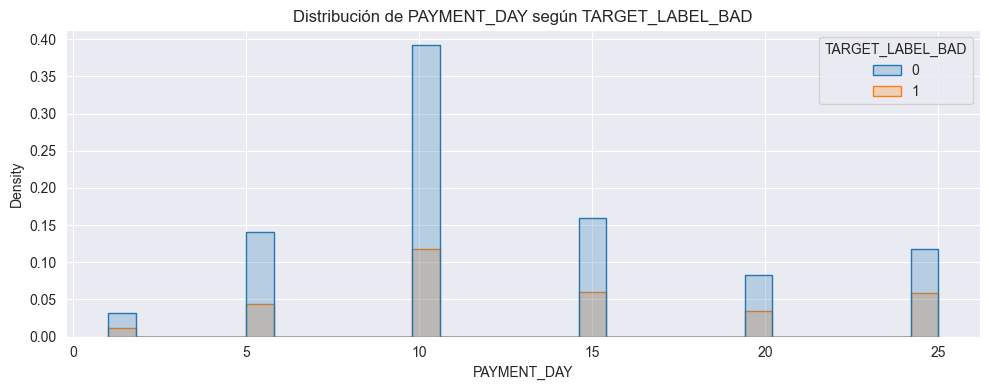

In [5]:
# Gráfico de distribución para PAYMENT_DAY
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="PAYMENT_DAY", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de PAYMENT_DAY según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `PAYMENT_DAY`**  
> * Más concentración el 10 .. pero tampoco indica a mi criterio que los que pagan el 10 sean malos pagagores.
> * Podría valer la pena transformarla a variables categóricas como:
early_month (1–10),
mid_month (11–20),
end_month (21–31),
y observar si así mejora la capacidad predictiva.?????

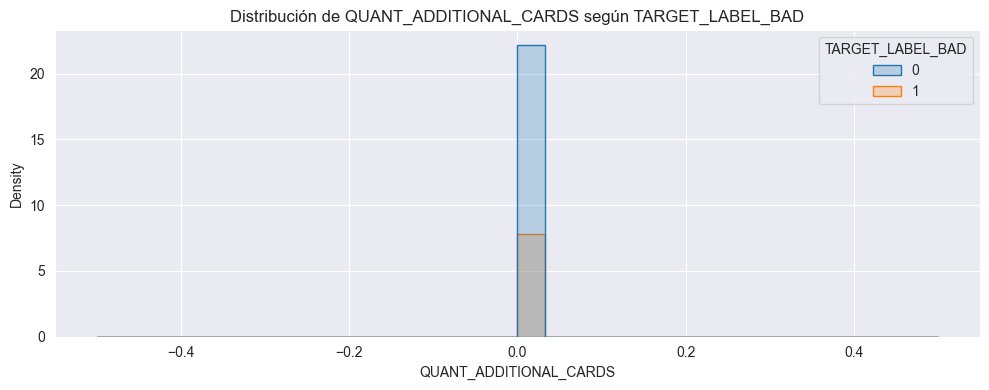

In [6]:
# Gráfico de distribución para QUANT_ADDITIONAL_CARDS
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="QUANT_ADDITIONAL_CARDS", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de QUANT_ADDITIONAL_CARDS según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `QUANT_ADDITIONAL_CARDS`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `QUANT_ADDITIONAL_CARDS` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

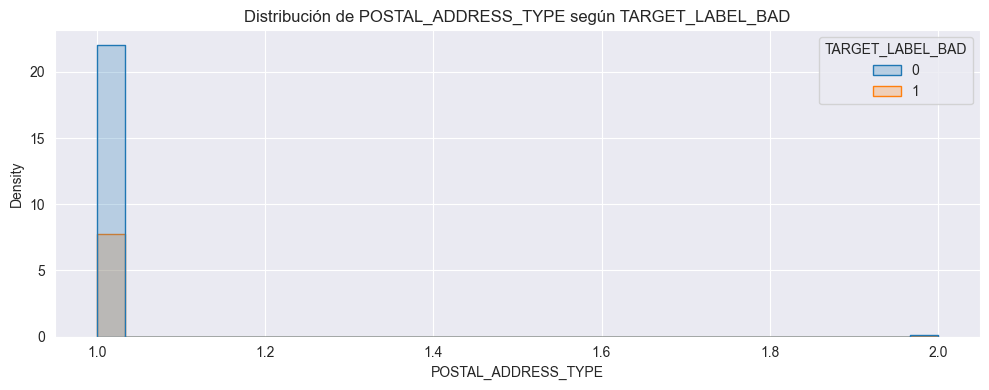

In [7]:
# Gráfico de distribución para POSTAL_ADDRESS_TYPE
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="POSTAL_ADDRESS_TYPE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de POSTAL_ADDRESS_TYPE según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `POSTAL_ADDRESS_TYPE`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `POSTAL_ADDRESS_TYPE` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

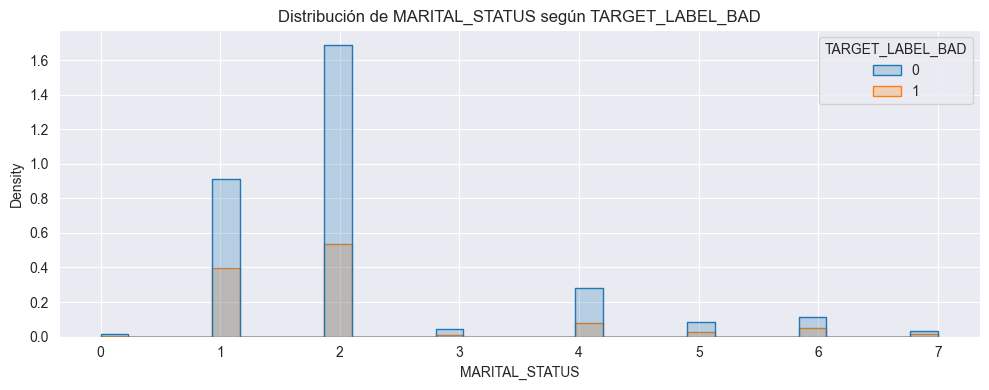

In [8]:
# Gráfico de distribución para MARITAL_STATUS
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="MARITAL_STATUS", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de MARITAL_STATUS según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `MARITAL_STATUS`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `MARITAL_STATUS` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

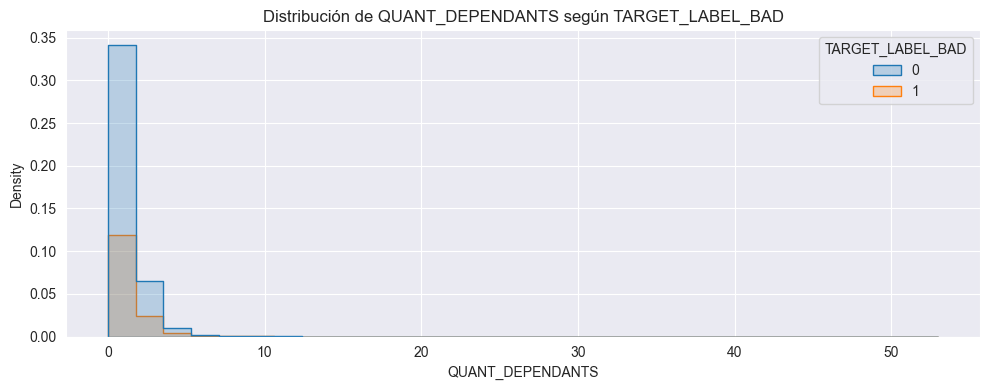

In [9]:
# Gráfico de distribución para QUANT_DEPENDANTS
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="QUANT_DEPENDANTS", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de QUANT_DEPENDANTS según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `QUANT_DEPENDANTS`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `QUANT_DEPENDANTS` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

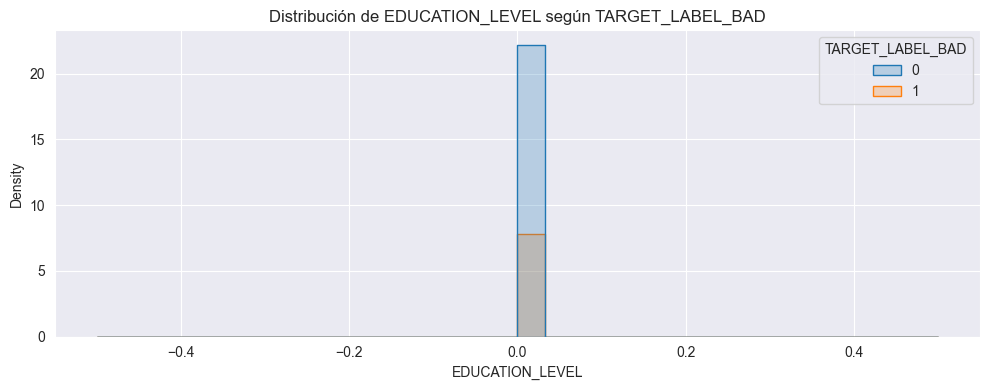

In [10]:
# Gráfico de distribución para EDUCATION_LEVEL
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="EDUCATION_LEVEL", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de EDUCATION_LEVEL según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `EDUCATION_LEVEL`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `EDUCATION_LEVEL` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

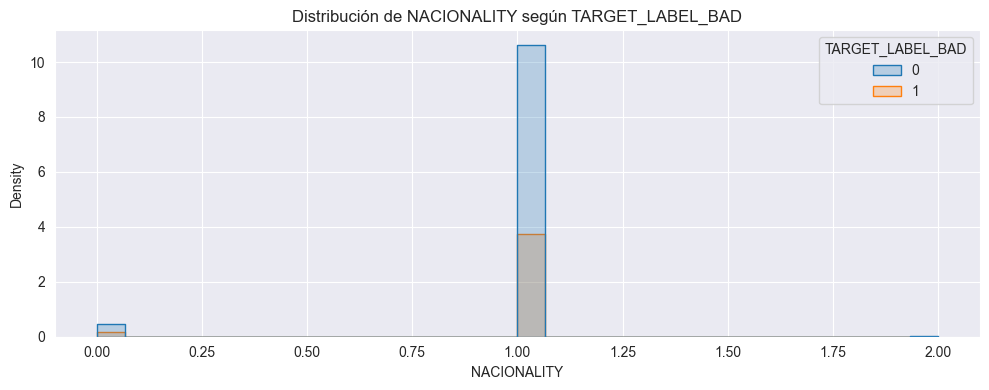

In [11]:
# Gráfico de distribución para NACIONALITY
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="NACIONALITY", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de NACIONALITY según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `NACIONALITY`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `NACIONALITY` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

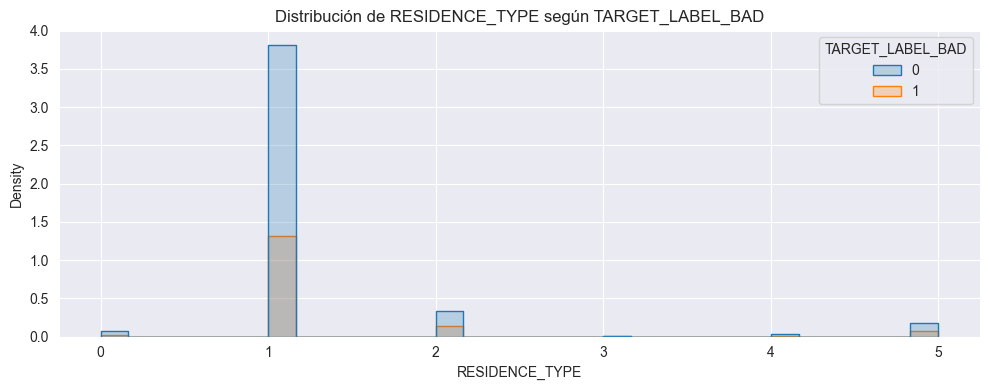

In [12]:
# Gráfico de distribución para RESIDENCE_TYPE
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="RESIDENCE_TYPE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de RESIDENCE_TYPE según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `RESIDENCE_TYPE`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `RESIDENCE_TYPE` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

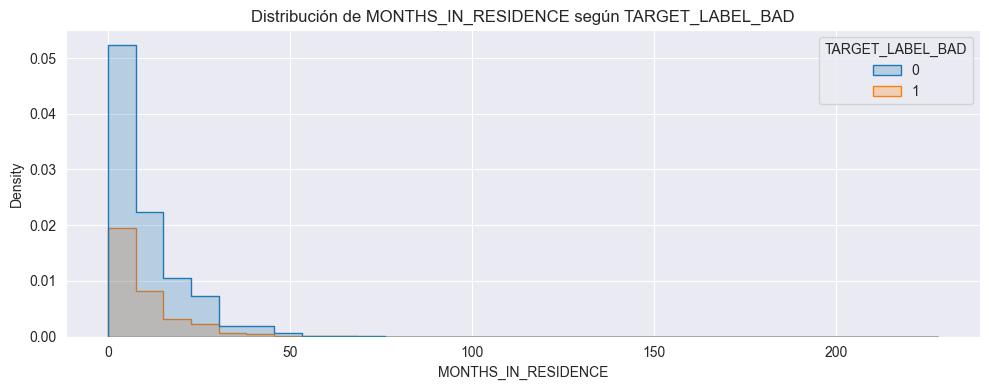

In [13]:
# Gráfico de distribución para MONTHS_IN_RESIDENCE
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="MONTHS_IN_RESIDENCE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de MONTHS_IN_RESIDENCE según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `MONTHS_IN_RESIDENCE`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `MONTHS_IN_RESIDENCE` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

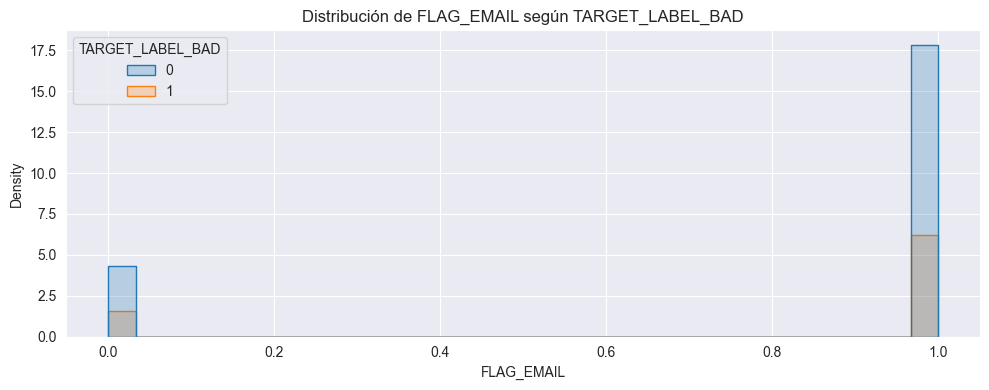

In [14]:
# Gráfico de distribución para FLAG_EMAIL
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="FLAG_EMAIL", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de FLAG_EMAIL según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `FLAG_EMAIL`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `FLAG_EMAIL` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

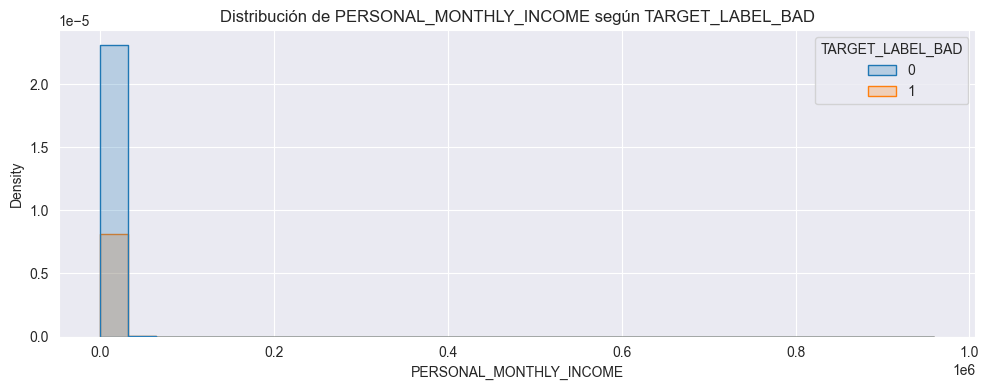

In [15]:
# Gráfico de distribución para PERSONAL_MONTHLY_INCOME
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="PERSONAL_MONTHLY_INCOME", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de PERSONAL_MONTHLY_INCOME según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `PERSONAL_MONTHLY_INCOME`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `PERSONAL_MONTHLY_INCOME` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

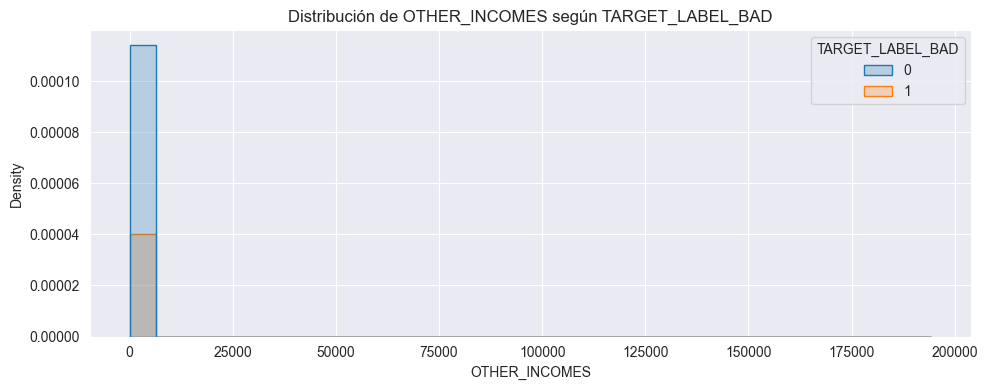

In [16]:
# Gráfico de distribución para OTHER_INCOMES
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="OTHER_INCOMES", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de OTHER_INCOMES según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `OTHER_INCOMES`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `OTHER_INCOMES` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

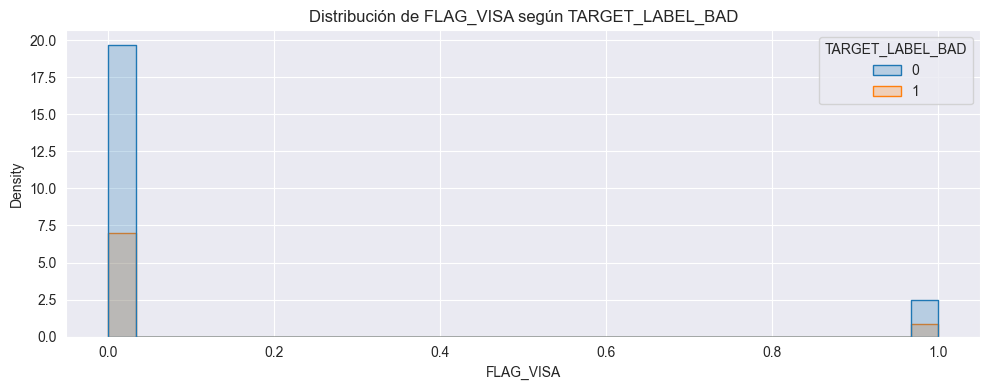

In [17]:
# Gráfico de distribución para FLAG_VISA
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="FLAG_VISA", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de FLAG_VISA según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `FLAG_VISA`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `FLAG_VISA` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

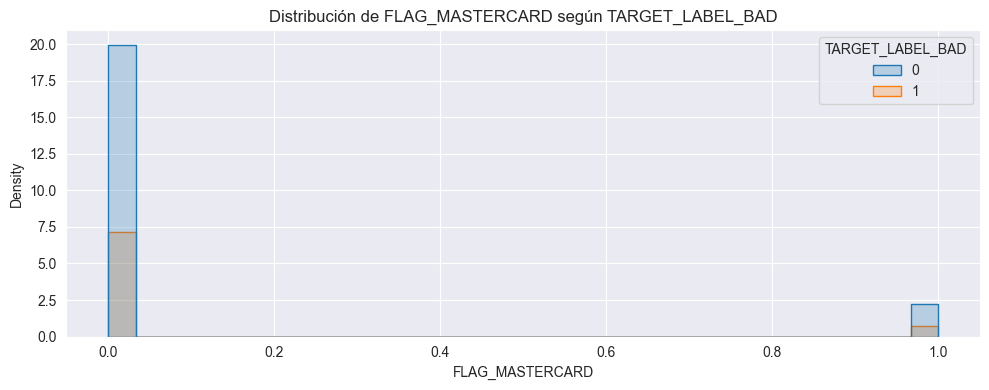

In [18]:
# Gráfico de distribución para FLAG_MASTERCARD
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="FLAG_MASTERCARD", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de FLAG_MASTERCARD según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `FLAG_MASTERCARD`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `FLAG_MASTERCARD` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

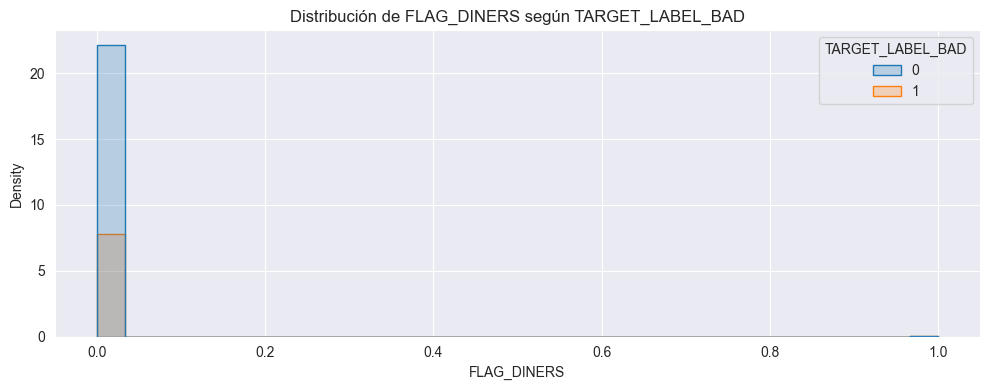

In [19]:
# Gráfico de distribución para FLAG_DINERS
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="FLAG_DINERS", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de FLAG_DINERS según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `FLAG_DINERS`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `FLAG_DINERS` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

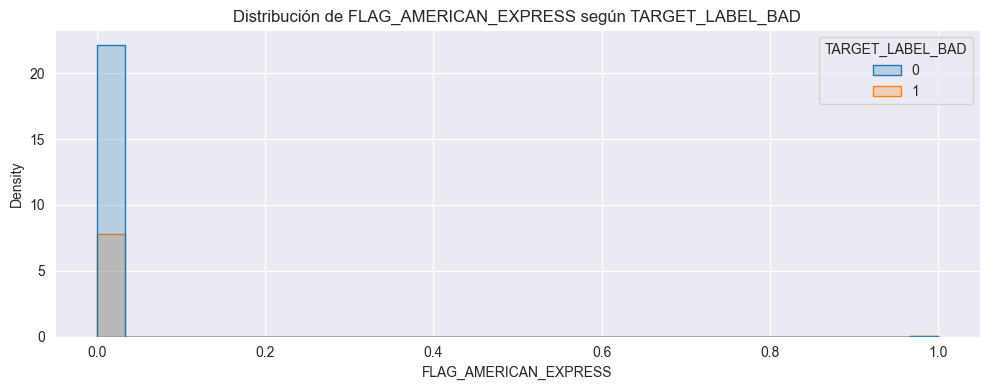

In [20]:
# Gráfico de distribución para FLAG_AMERICAN_EXPRESS
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="FLAG_AMERICAN_EXPRESS", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de FLAG_AMERICAN_EXPRESS según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `FLAG_AMERICAN_EXPRESS`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `FLAG_AMERICAN_EXPRESS` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

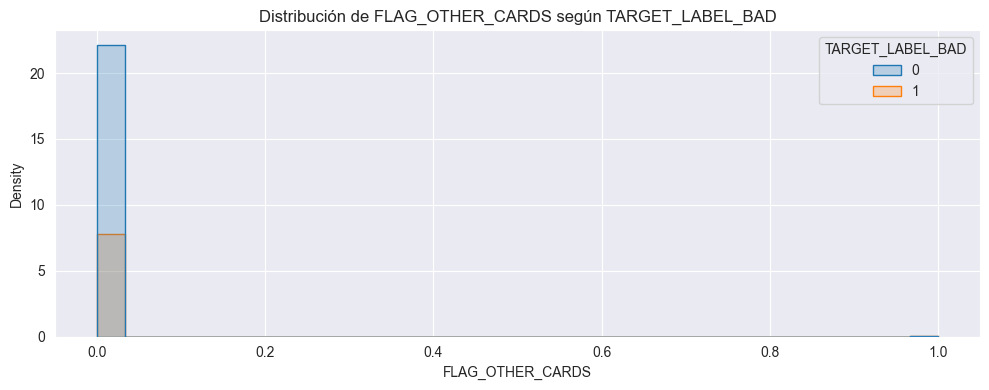

In [21]:
# Gráfico de distribución para FLAG_OTHER_CARDS
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="FLAG_OTHER_CARDS", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de FLAG_OTHER_CARDS según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `FLAG_OTHER_CARDS`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `FLAG_OTHER_CARDS` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

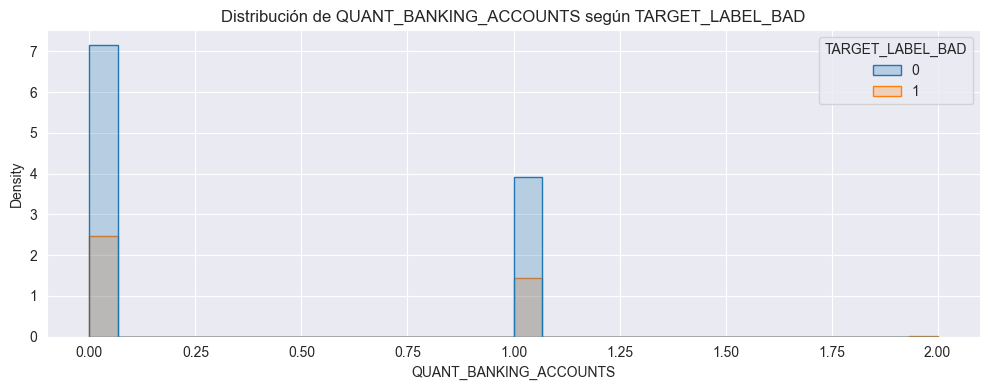

In [22]:
# Gráfico de distribución para QUANT_BANKING_ACCOUNTS
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="QUANT_BANKING_ACCOUNTS", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de QUANT_BANKING_ACCOUNTS según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `QUANT_BANKING_ACCOUNTS`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `QUANT_BANKING_ACCOUNTS` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

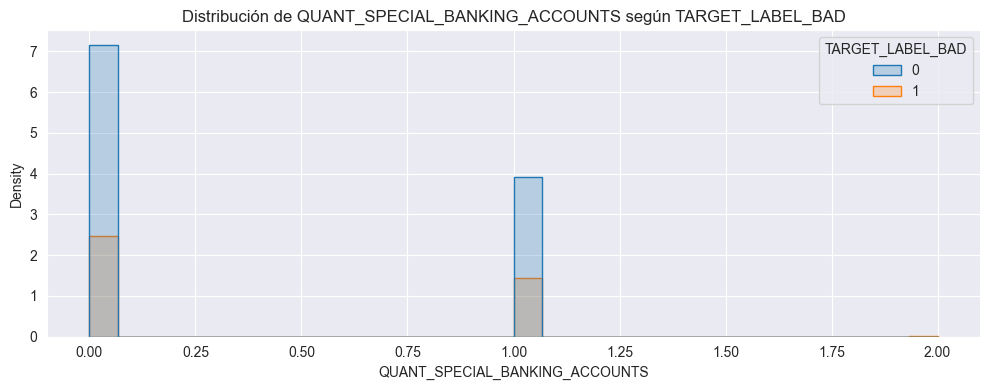

In [23]:
# Gráfico de distribución para QUANT_SPECIAL_BANKING_ACCOUNTS
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="QUANT_SPECIAL_BANKING_ACCOUNTS", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de QUANT_SPECIAL_BANKING_ACCOUNTS según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `QUANT_SPECIAL_BANKING_ACCOUNTS`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `QUANT_SPECIAL_BANKING_ACCOUNTS` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

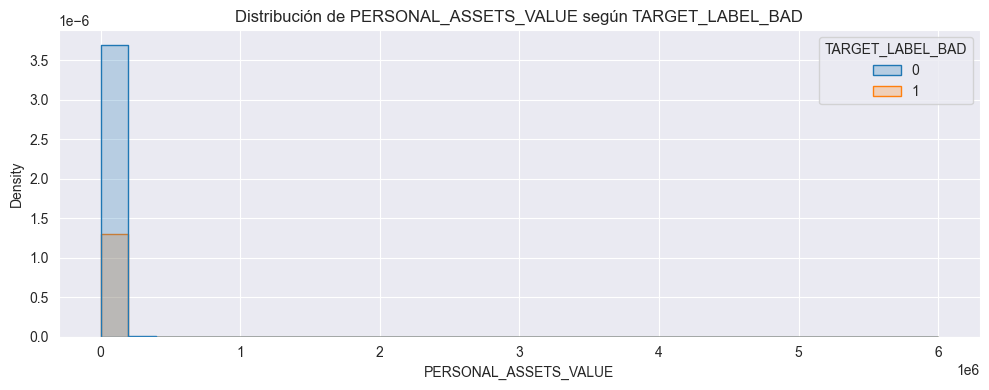

In [24]:
# Gráfico de distribución para PERSONAL_ASSETS_VALUE
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="PERSONAL_ASSETS_VALUE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de PERSONAL_ASSETS_VALUE según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `PERSONAL_ASSETS_VALUE`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `PERSONAL_ASSETS_VALUE` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

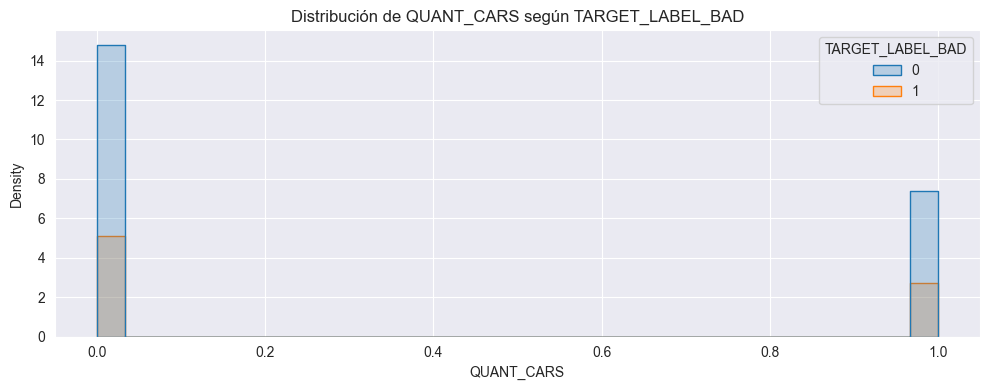

In [25]:
# Gráfico de distribución para QUANT_CARS
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="QUANT_CARS", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de QUANT_CARS según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `QUANT_CARS`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `QUANT_CARS` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

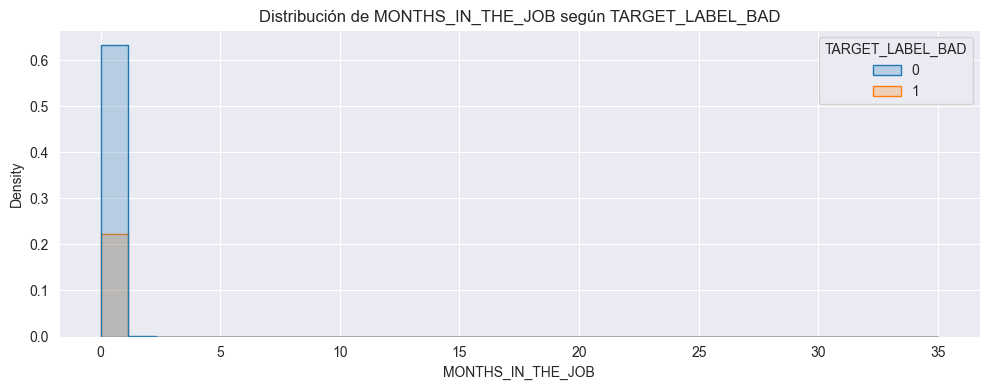

In [26]:
# Gráfico de distribución para MONTHS_IN_THE_JOB
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="MONTHS_IN_THE_JOB", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de MONTHS_IN_THE_JOB según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `MONTHS_IN_THE_JOB`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `MONTHS_IN_THE_JOB` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

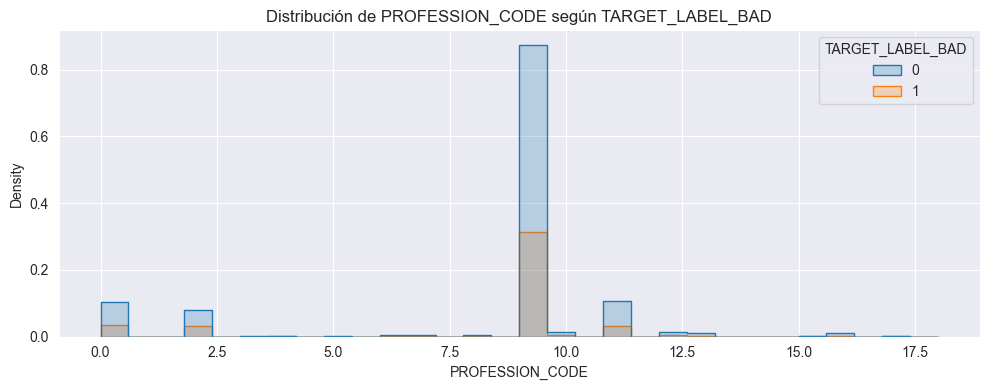

In [27]:
# Gráfico de distribución para PROFESSION_CODE
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="PROFESSION_CODE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de PROFESSION_CODE según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `PROFESSION_CODE`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `PROFESSION_CODE` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

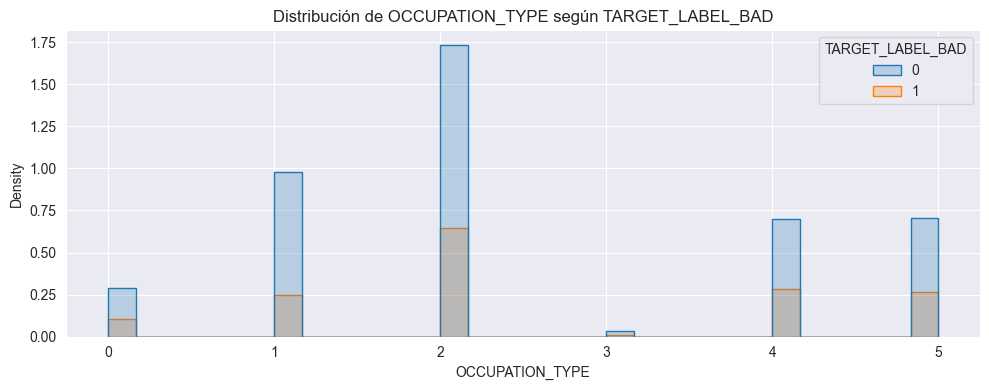

In [28]:
# Gráfico de distribución para OCCUPATION_TYPE
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="OCCUPATION_TYPE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de OCCUPATION_TYPE según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `OCCUPATION_TYPE`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `OCCUPATION_TYPE` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

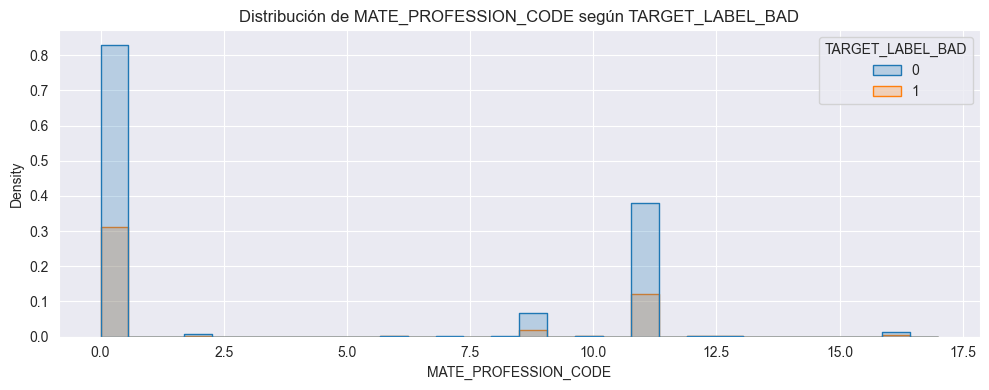

In [29]:
# Gráfico de distribución para MATE_PROFESSION_CODE
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="MATE_PROFESSION_CODE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de MATE_PROFESSION_CODE según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `MATE_PROFESSION_CODE`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `MATE_PROFESSION_CODE` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

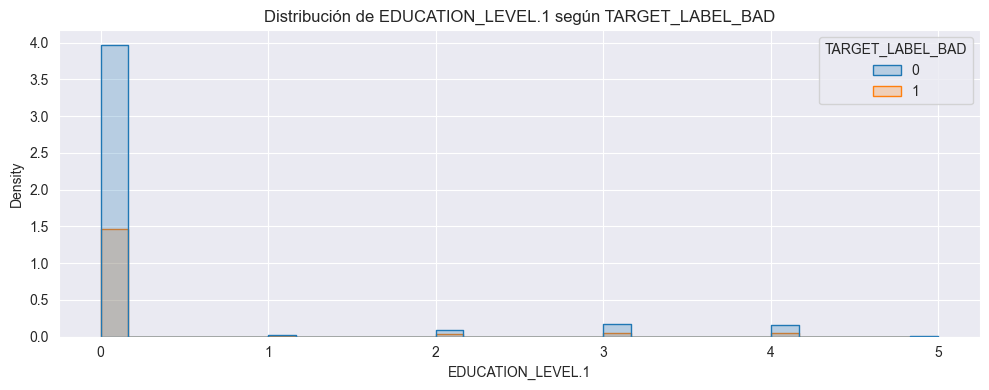

In [30]:
# Gráfico de distribución para EDUCATION_LEVEL.1
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="EDUCATION_LEVEL.1", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de EDUCATION_LEVEL.1 según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `EDUCATION_LEVEL.1`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `EDUCATION_LEVEL.1` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

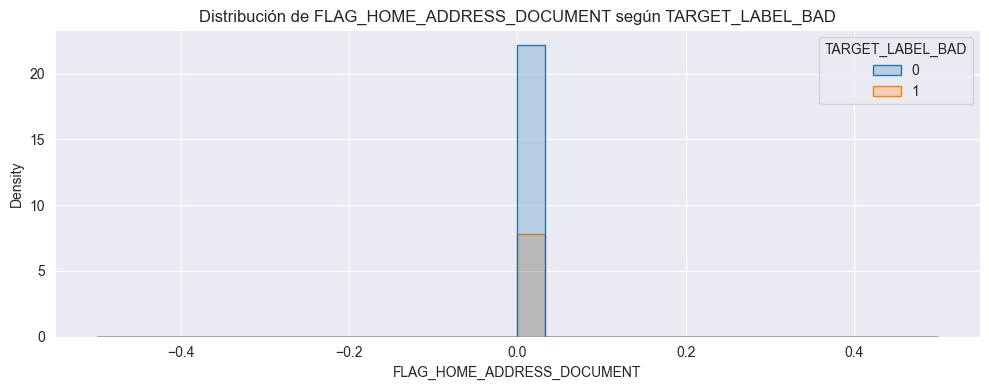

In [31]:
# Gráfico de distribución para FLAG_HOME_ADDRESS_DOCUMENT
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="FLAG_HOME_ADDRESS_DOCUMENT", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de FLAG_HOME_ADDRESS_DOCUMENT según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `FLAG_HOME_ADDRESS_DOCUMENT`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `FLAG_HOME_ADDRESS_DOCUMENT` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

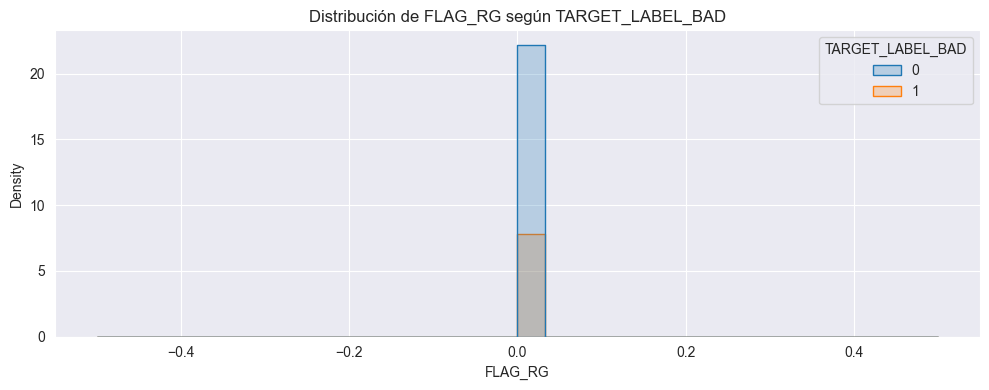

In [32]:
# Gráfico de distribución para FLAG_RG
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="FLAG_RG", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de FLAG_RG según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `FLAG_RG`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `FLAG_RG` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

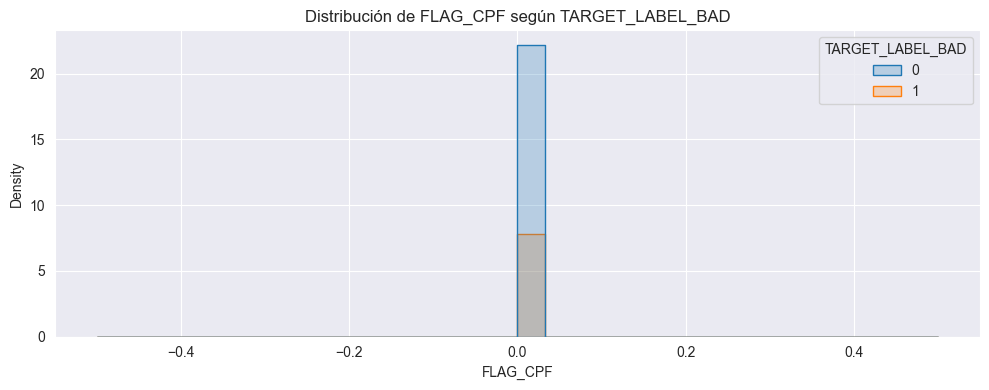

In [33]:
# Gráfico de distribución para FLAG_CPF
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="FLAG_CPF", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de FLAG_CPF según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `FLAG_CPF`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `FLAG_CPF` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

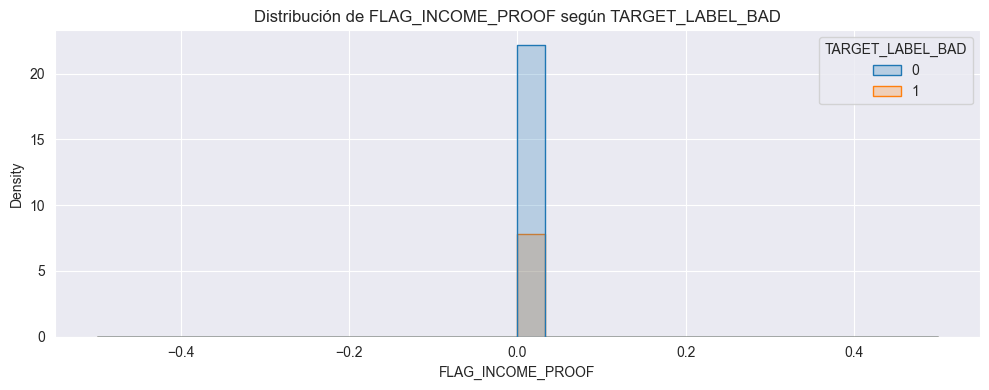

In [34]:
# Gráfico de distribución para FLAG_INCOME_PROOF
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="FLAG_INCOME_PROOF", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de FLAG_INCOME_PROOF según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `FLAG_INCOME_PROOF`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `FLAG_INCOME_PROOF` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

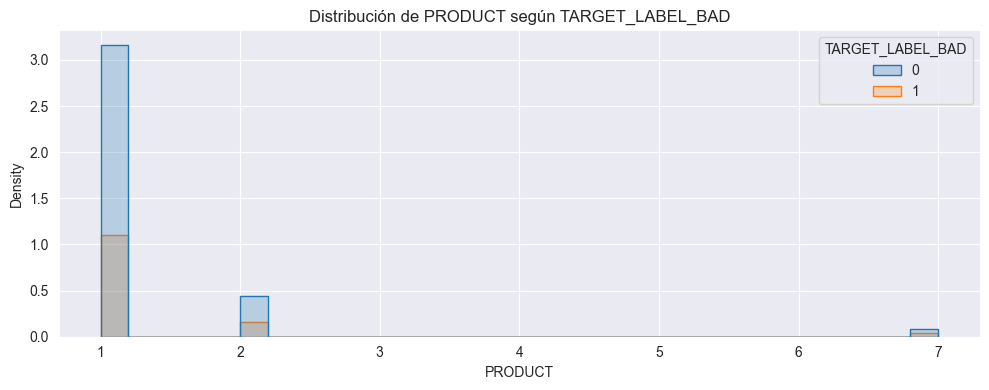

In [35]:
# Gráfico de distribución para PRODUCT
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="PRODUCT", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de PRODUCT según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `PRODUCT`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `PRODUCT` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

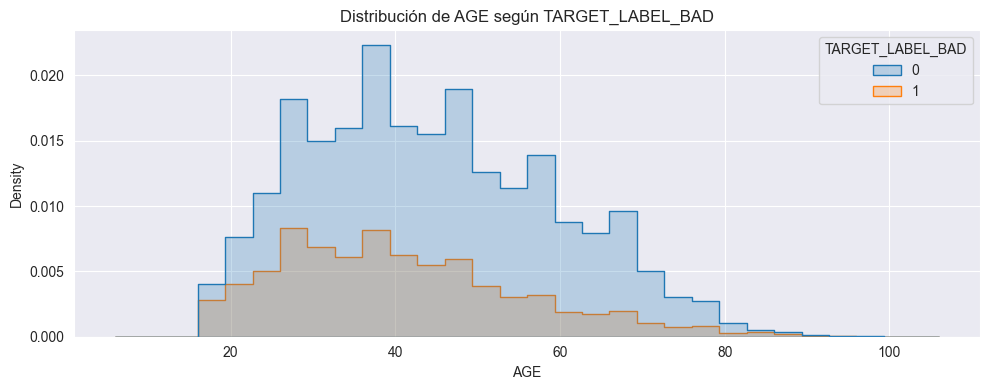

In [36]:
# Gráfico de distribución para AGE
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="AGE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de AGE según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `AGE`**  
(Agregá acá una interpretación manual sobre cómo los valores bajos o altos se relacionan con el riesgo. Por ejemplo:  
> *Se observa que quienes tienen menos `AGE` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1, lo que sugiere que es un posible indicador de riesgo.*  
Este análisis debe ajustarse a lo que se observa visualmente.)

## 3. Análisis de Correlación con el label

In [37]:
correlation_matrix = numeric_df.copy()
correlation_matrix["TARGET_LABEL_BAD"] = df["TARGET_LABEL_BAD"]
correlations = correlation_matrix.corr()["TARGET_LABEL_BAD"].sort_values(ascending=False)
print(correlations)

TARGET_LABEL_BAD                  1.000000
PAYMENT_DAY                       0.070633
OCCUPATION_TYPE                   0.040216
PRODUCT                           0.019293
RESIDENCE_TYPE                    0.019168
QUANT_DEPENDANTS                  0.012157
QUANT_SPECIAL_BANKING_ACCOUNTS    0.011997
QUANT_BANKING_ACCOUNTS            0.011997
QUANT_CARS                        0.011706
OTHER_INCOMES                     0.004442
PERSONAL_MONTHLY_INCOME           0.002819
FLAG_DINERS                       0.002240
FLAG_OTHER_CARDS                  0.001410
FLAG_AMERICAN_EXPRESS             0.000337
NACIONALITY                      -0.000952
POSTAL_ADDRESS_TYPE              -0.002423
PERSONAL_ASSETS_VALUE            -0.003886
FLAG_VISA                        -0.005398
MONTHS_IN_THE_JOB                -0.007073
FLAG_EMAIL                       -0.008067
PROFESSION_CODE                  -0.011593
FLAG_MASTERCARD                  -0.017658
MONTHS_IN_RESIDENCE              -0.029336
MARITAL_STA

**Conclusión:**  
Aunque las correlaciones absolutas no son muy altas, variables como `AGE` (negativa) o `PAYMENT_DAY` (positiva) muestran cierta relación con el riesgo de incumplimiento. Esto sugiere que podrían ser útiles para modelos de clasificación, aunque no determinantes por sí solas.

## 4. Comparación de medias por clase

In [38]:
means_by_label = numeric_df.copy()
means_by_label["TARGET_LABEL_BAD"] = df["TARGET_LABEL_BAD"]
means = means_by_label.groupby("TARGET_LABEL_BAD").mean().T
means["diferencia"] = means[1] - means[0]
means.sort_values("diferencia", ascending=False)

TARGET_LABEL_BAD,0,1,diferencia
PERSONAL_MONTHLY_INCOME,873.540385,923.912488,50.372103
OTHER_INCOMES,33.082406,42.101475,9.019068
PAYMENT_DAY,12.592657,13.655701,1.063045
OCCUPATION_TYPE,2.447816,2.588347,0.140530
PRODUCT,1.264374,1.307798,0.043424
RESIDENCE_TYPE,1.242336,1.280205,0.037869
QUANT_DEPENDANTS,0.641900,0.674948,0.033048
QUANT_SPECIAL_BANKING_ACCOUNTS,0.354420,0.367533,0.013113
QUANT_BANKING_ACCOUNTS,0.354420,0.367533,0.013113
QUANT_CARS,0.332855,0.345449,0.012594


**Conclusión:**  
La diferencia de medias permite observar qué variables numéricas tienden a ser más altas o bajas en personas con mal comportamiento crediticio (`TARGET_LABEL_BAD = 1`). Las mayores diferencias se observan en variables como ingresos, edad y activos personales.

## 5. Preprocesamiento sugerido

In [39]:
# Imputación de nulos con mediana
cols_with_nans = ["EDUCATION_LEVEL.1", "MATE_PROFESSION_CODE", "PROFESSION_CODE", "OCCUPATION_TYPE", "MONTHS_IN_RESIDENCE"]
for col in cols_with_nans:
    df[col].fillna(df[col].median(), inplace=True)

In [40]:
# Transformación logarítmica de variables asimétricas
log_transform_cols = ["PERSONAL_ASSETS_VALUE", "PERSONAL_MONTHLY_INCOME", "OTHER_INCOMES", "MONTHS_IN_THE_JOB", "MONTHS_IN_RESIDENCE"]
for col in log_transform_cols:
    df[col] = np.log1p(df[col])

In [41]:
# Escalado estándar
scaler = StandardScaler()
scaled_cols = ["AGE", "PERSONAL_MONTHLY_INCOME", "OTHER_INCOMES", "PERSONAL_ASSETS_VALUE", "MONTHS_IN_THE_JOB"]
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])